In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/My Drive/Colab Notebooks/hidreletrica/databases/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install geopandas
!pip install geoplot
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt

#ANÁLISE DO SETOR HIDRELÉTRICO BRASILEIRO - VISUALIZAÇÕES ESPACIAIS 
Avaliação dos possíveis fatores para a tomada de decisão da construção de uma usina hidrelétrica em um ponto estratégico.

In [ ]:
estados = gpd.read_file(path + 'lim_unidade_federacao')
estados = estados[['nome', 'sigla', 'geometry']]
estados.rename(columns = {'sigla':'UF', 'nome':'estado'}, inplace = True)
estados['coordenadas'] = estados['geometry'].centroid
estados.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


,estado,UF,geometry,coordenadas
0,Bahia,BA,"MULTIPOLYGON (((-38.71080 -17.96966, -38.70848...",POINT (-41.72018 -12.47296)
1,Pará,PA,"MULTIPOLYGON (((-46.45928 -0.90961, -46.45936 ...",POINT (-53.06254 -3.97218)
2,Rio de Janeiro,RJ,"MULTIPOLYGON (((-43.55929 -23.08050, -43.55938...",POINT (-42.66308 -22.19582)
3,São Paulo,SP,"MULTIPOLYGON (((-45.13777 -23.79018, -45.13777...",POINT (-48.72945 -22.26441)
4,Espírito Santo,ES,"MULTIPOLYGON (((-28.85365 -20.47547, -28.85372...",POINT (-40.66811 -19.57476)


#PRECIPITAÇÃO NO TERRITÓRIO BRASILEIRO
O volume de chuvas em uma região pode influenciar a tomada de decisão na exploração de recursos hidrícos para a produção de energia.

Análise da Rede hidrometeorológica nacional, com base nos dados de precipitação média anual, dos anos de 1977 a 2006, produzidos pelo Serviço Geológico do Brasil (CPRM) e disponibilizados pelo Sistema Nacional de Informações sobre Recursos Hídricos (SNIRH).

Link: https://portal1.snirh.gov.br/ana/home/item.html?id=108056f3de114f848adc006201ca74cf

In [ ]:
precipitacao = gpd.read_file(path + 'SNIRH_Isoietas')
precipitacao.rename(columns = {'PCP_NU_ISO':'chuva_mm'}, inplace = True)
precipitacao.head()

,chuva_mm,geometry
0,2100.0,"LINESTRING (-63.73016 -11.07136, -63.72910 -11..."
1,2000.0,"LINESTRING (-44.77450 -22.42481, -44.77438 -22..."
2,2100.0,"LINESTRING (-43.27034 -22.96332, -43.27034 -22..."
3,2100.0,"LINESTRING (-43.28128 -22.95964, -43.28139 -22..."
4,2800.0,"LINESTRING (-42.56608 -22.38085, -42.56619 -22..."


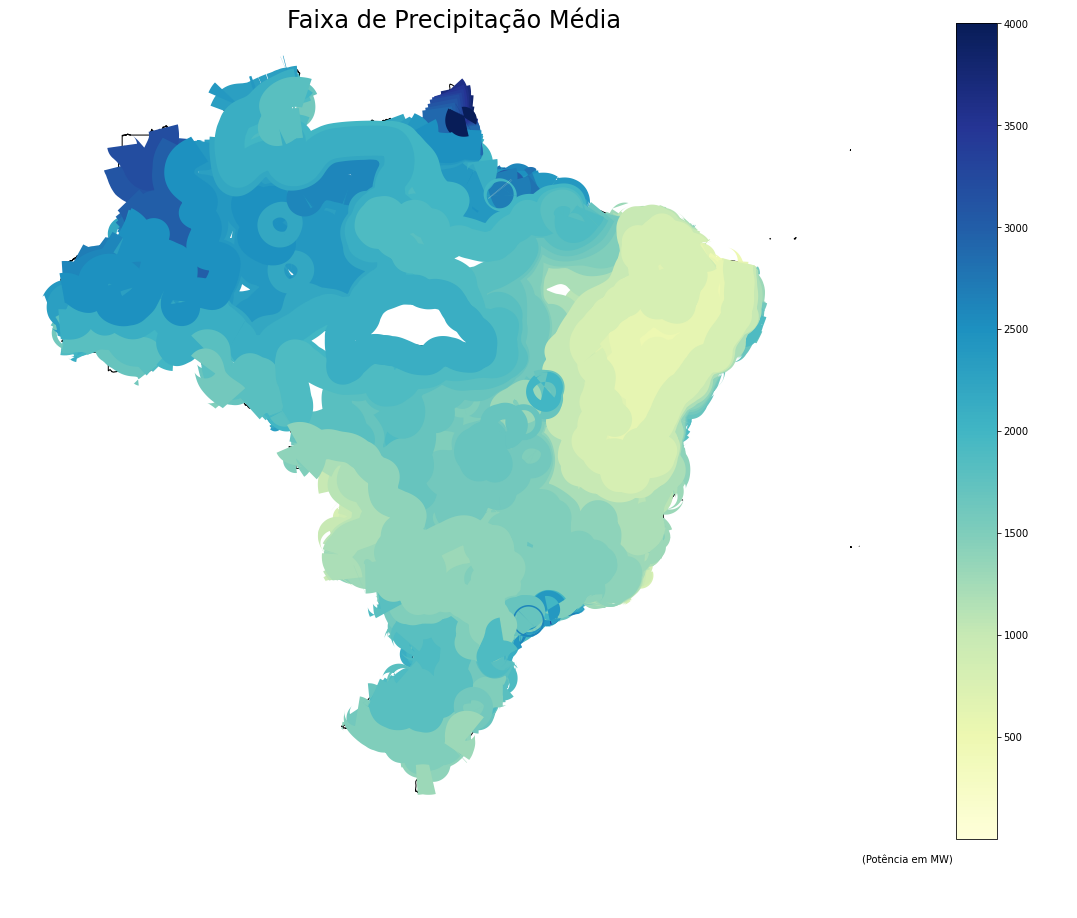

In [ ]:
fig, gax = plt.subplots(figsize = (20,15))
plt.title("Faixa de Precipitação Média", fontsize=24)
estados.plot(
    ax=gax, 
    edgecolor='black',
    color='white',
    linewidth=1
    )
precipitacao.plot(
    ax=gax, 
    edgecolor='black', 
    column='chuva_mm',
    linewidth=30, 
    cmap='YlGnBu', 
    legend=True,
    vmin=1, vmax=4000
    )

# Add text to let people know what we coolwarm plotting
gax.annotate('(Potência em MW)',xy=(0.8, 0.06),  xycoords='figure fraction')

# I don't want the axis with long and lat
plt.axis('off')
plt.show()

#Distribuição da População Brasileira por Bacia Hidrográfica
Divisão de bacias hidrográficas no território nacional e a relação com o número de habitantes por quilômetro quadrado nesse espaço, pode influenciar na decisão de construção de uma usina.


Análise da densidade demográfica delimitada pelas bacias hidrográficas em território nacional, realizada no Censo de 2010 e fornecida pelo Instituto Brasileiro de Geografia e Estatística (IBGE).

Link: https://portaldemapas.ibge.gov.br/

In [ ]:
dens_dem_bacia = gpd.read_file(path + 'C04_densidade_demog_por_bacia_hidrografica_2010')
dens_dem_bacia['coordenadas'] = dens_dem_bacia['geometry'].centroid
dens_dem_bacia['Bacia'] = dens_dem_bacia['Bacia'].str.replace(r'Rio', '')
dens_dem_bacia.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,Bacia,DenPopBac,geometry,coordenadas
0,Negro,3,"POLYGON ((-61.50786 4.32195, -61.52064 4.32556...",POINT (-63.68221 0.43107)
1,Oiapoque,1,"POLYGON ((-52.90546 2.18583, -52.88454 2.21842...",POINT (-51.54965 2.82225)
2,Apodi,34,"POLYGON ((-37.53994 -4.64362, -37.49599 -4.625...",POINT (-37.65101 -5.63799)
3,Araguari,1,"POLYGON ((-52.90514 2.18493, -52.89836 2.18999...",POINT (-51.59893 1.37712)
4,Capibaribe,327,"POLYGON ((-34.83468 -7.54994, -34.83780 -7.564...",POINT (-35.63909 -7.92337)


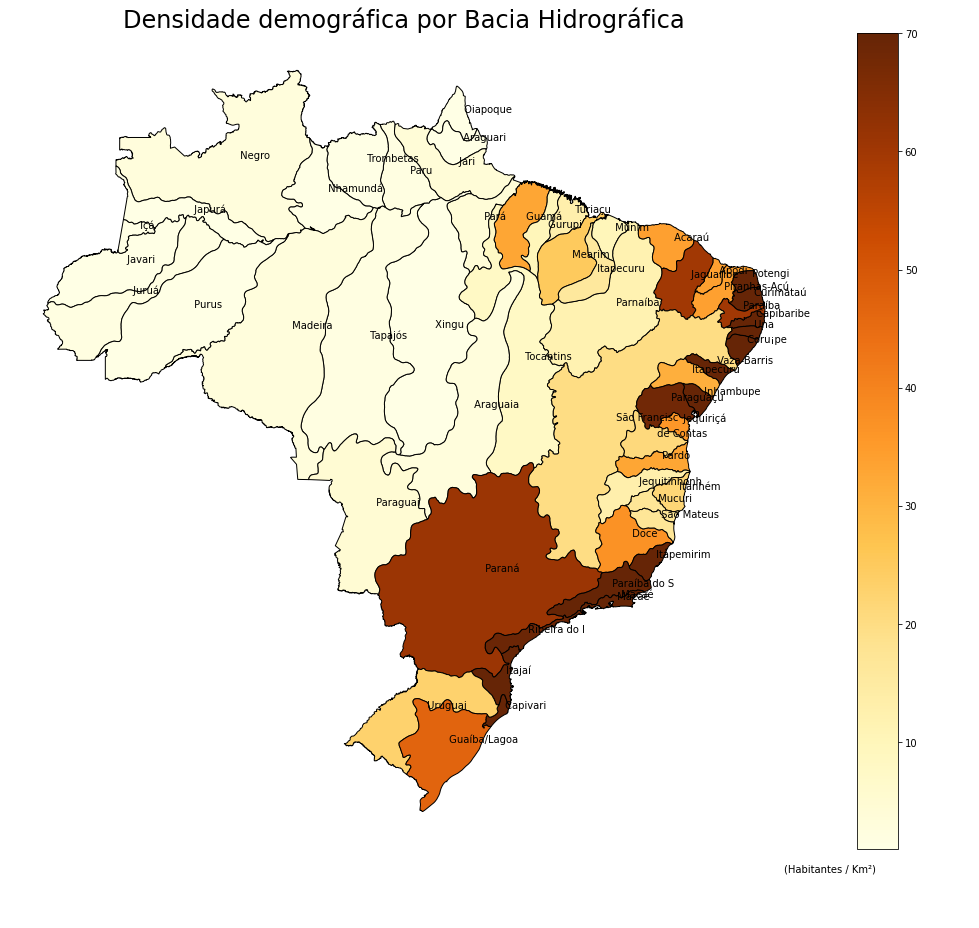

In [ ]:
fig, gax = plt.subplots(figsize = (20,15))
plt.title("Densidade demográfica por Bacia Hidrográfica", fontsize=24)
# Plot the counties and pass 'rel_trump_share' as the data to color
dens_dem_bacia.plot(
    ax=gax, 
    edgecolor='black', 
    column='DenPopBac', 
    legend=True, 
    cmap='YlOrBr',
    vmin=1, vmax=70
    )
# Add text to let people know what we are plotting
gax.annotate('(Habitantes / Km²)',xy=(0.8, 0.06),  xycoords='figure fraction')

# I don't want the axis with long and lat
plt.axis('off')

for x, y, label in zip(dens_dem_bacia['coordenadas'].x, dens_dem_bacia['coordenadas'].y, dens_dem_bacia['Bacia']):
    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

plt.show()

#Produção Energética por estados
Quanto cada estado gera de energia em Megawatts, onde cada usina hidrelétrica está localizada e qual o seu potencial energético.

Análise do potencial de geração de energia por unidade federativa, com base na capacidade das hidrelétricas situadas no estado. Foi realizada a junção de uma base de delimitação territorial proveniente do IBGE para georeferenciar os campos e a base de dados das hidrelétricas citada anteriormente, para agrupar as usinas por estado e definir o peso a partir da potencia em MegaWatts.

Link: https://portaldemapas.ibge.gov.br/portal.php#mapa207950

In [ ]:
hidreletricas_geo = gpd.read_file(path + 'LE2015_00_potencia_usina_hidreletrica.csv')
hidreletricas_geo = hidreletricas_geo[['usina', 'p_out_mw', 'geom']]
hidreletricas_geo.rename(columns = {'geom':'geometry', 'p_out_mw':'potencia_MW'}, inplace = True)
hidreletricas_geo['potencia_MW'] = pd.to_numeric(hidreletricas_geo['potencia_MW'])
hidreletricas_geo['geometry'] = gpd.GeoSeries.from_wkt(hidreletricas_geo['geometry'])
hidreletricas_geo = gpd.GeoDataFrame(hidreletricas_geo, geometry='geometry')
hidreletricas_geo.sort_values('potencia_MW', 
                      inplace=True, 
                      ascending=False)
hidreletricas_geo.head()

,usina,potencia_MW,geometry
101,Tucuruí I e II,8535.0,MULTIPOINT (-49.65222 -3.83222)
111,Itaipu (Parte Brasileira),7000.0,MULTIPOINT (-54.59306 -25.42694)
82,Jirau,3750.0,MULTIPOINT (-64.73444 -9.33111)
65,Ilha Solteira,3444.0,MULTIPOINT (-51.36361 -20.38222)
117,Xingó,3162.0,MULTIPOINT (-37.79237 -9.62089)


In [ ]:
hidreletricas = gpd.read_file(path + 'hidreletricas.csv')
hidreletricas = hidreletricas[['CodUsina', 'Usina', 'UF', 'Potência Outorgada (kW)', 'Sistema', 'Fase']]
hidreletricas.rename(columns = {'Potência Outorgada (kW)':'potencia_MW'}, inplace = True)
hidreletricas = hidreletricas[hidreletricas.UF != '']
hidreletricas = hidreletricas[hidreletricas.potencia_MW != '']
hidreletricas = hidreletricas[hidreletricas.potencia_MW != 'Operação']
hidreletricas['potencia_MW'] = pd.to_numeric(hidreletricas['potencia_MW'])
hidreletricas['potencia_MW'] = hidreletricas['potencia_MW'] / 1000
hidreletricas.head()

,CodUsina,Usina,UF,potencia_MW,Sistema,Fase
0,1,CAMARGOS,MG,46.00,1 - Sudeste,Operação
1,2,ITUTINGA,MG,52.00,1 - Sudeste,Operação
2,6,FURNAS,MG,1216.00,1 - Sudeste,Operação
3,7,M. DE MORAES,MG,476.00,1 - Sudeste,Operação
4,8,ESTREITO,SC,2.16,1 - Sudeste,Operação


In [ ]:
hidreletricas_estados = hidreletricas.groupby(['UF']).sum()
hidreletricas_estados = pd.merge(estados, hidreletricas_estados, on=['UF'], how='left')
hidreletricas_estados.head()

,estado,UF,geometry,coordenadas,potencia_MW
0,Bahia,BA,"MULTIPOLYGON (((-38.71080 -17.96966, -38.70848...",POINT (-41.72018 -12.47296),4928.911
1,Pará,PA,"MULTIPOLYGON (((-46.45928 -0.90961, -46.45936 ...",POINT (-53.06254 -3.97218),22330.700
2,Rio de Janeiro,RJ,"MULTIPOLYGON (((-43.55929 -23.08050, -43.55938...",POINT (-42.66308 -22.19582),799.887
3,São Paulo,SP,"MULTIPOLYGON (((-45.13777 -23.79018, -45.13777...",POINT (-48.72945 -22.26441),12612.846
4,Espírito Santo,ES,"MULTIPOLYGON (((-28.85365 -20.47547, -28.85372...",POINT (-40.66811 -19.57476),280.000


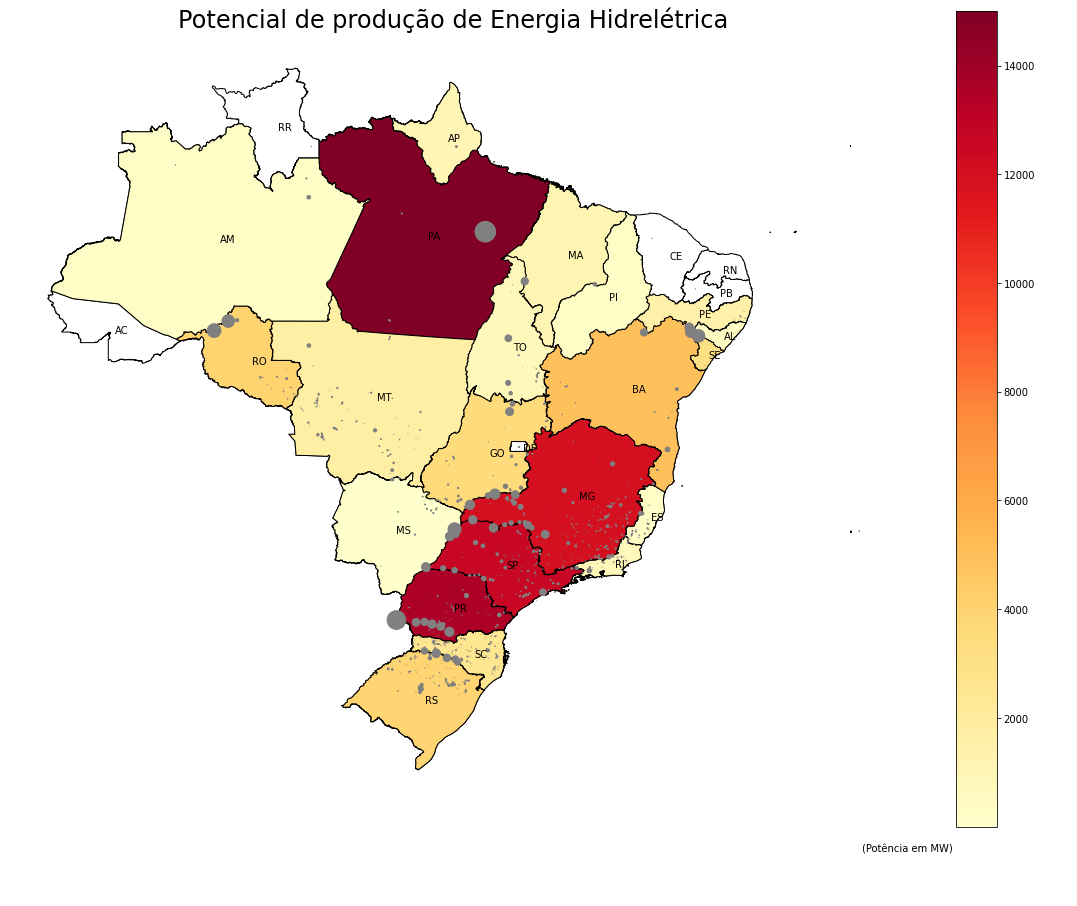

In [ ]:
fig, gax = plt.subplots(figsize = (20,15))
plt.title("Potencial de produção de Energia Hidrelétrica", fontsize=24)
estados.plot(
    ax=gax, 
    edgecolor='black',
    color='white',
    linewidth=1
    )
hidreletricas_estados.plot(
    ax=gax, 
    edgecolor='black', 
    column='potencia_MW',
    linewidth=1, 
    cmap='YlOrRd', 
    legend=True,
    vmin=1, vmax=15000
    )

hidreletricas_geo.plot(ax=gax, 
                       marker='o', 
                       color='grey', 
                       legend=('Hidreletricas'), 
                       markersize=hidreletricas_geo['potencia_MW']*0.05)

# Add text to let people know what we coolwarm plotting
gax.annotate('(Potência em MW)',xy=(0.8, 0.06),  xycoords='figure fraction')

# I don't want the axis with long and lat
plt.axis('off')

for x, y, label in zip(hidreletricas_estados['coordenadas'].x, hidreletricas_estados['coordenadas'].y, hidreletricas_estados['UF']):
    gax.annotate(label, xy=(x,y-0.5), xytext=(4,4), textcoords='offset points')

plt.show()